In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
import neural_process
from gp_curves import GPCurvesGenerator, plot_func


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
TRAINING_ITERATIONS = int(1e5)
MAX_CONTEXT_POINTS = 10
PLOT_AFTER = int(1e4)

In [4]:
dataset_train = GPCurvesGenerator(batch_size=64, max_size=MAX_CONTEXT_POINTS)
data_train = dataset_train.generate()

In [5]:
dataset_test = GPCurvesGenerator(batch_size=1, max_size=MAX_CONTEXT_POINTS, testing=True)
data_test = dataset_test.generate()

In [6]:
encoder_output_sizes = [128, 128, 128, 128]
decoder_output_sizes = [128, 128, 1]

model = neural_process.ConditionalNP(encoder_output_sizes, decoder_output_sizes)

loss = model.loss(data_train.context,
                  data_train.query,
                  data_train.target)

_, mu, sigma = model(data_test.context, data_test.query)

opt = tf.train.AdamOptimizer(1e-4).minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Iteration: 0, loss: 1.1675840616226196


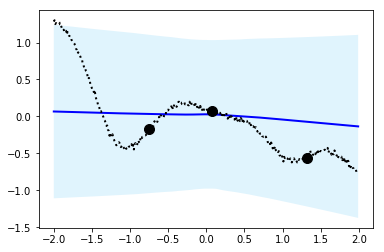

Iteration: 10000, loss: 0.36013802886009216


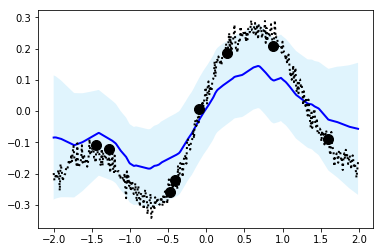

Iteration: 20000, loss: 0.1580076515674591


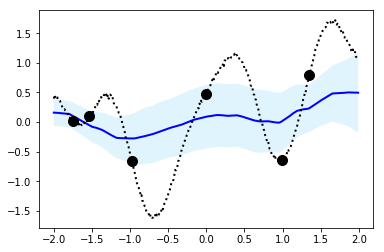

Iteration: 30000, loss: 0.46510928869247437


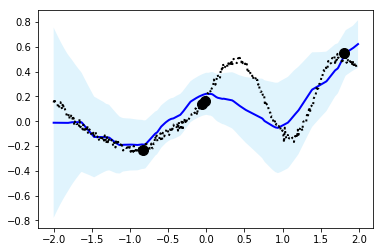

Iteration: 40000, loss: -0.0005421281093731523


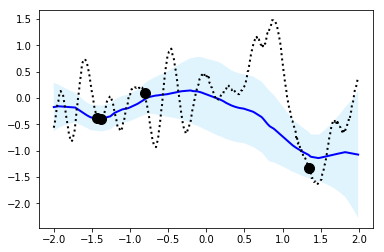

Iteration: 50000, loss: 0.11189771443605423


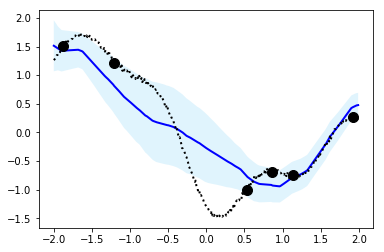

Iteration: 60000, loss: 0.030100271105766296


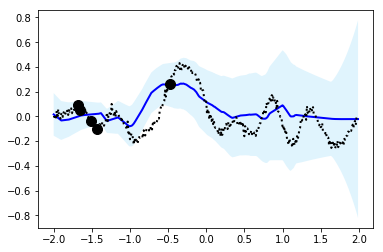

Iteration: 70000, loss: -0.12697237730026245


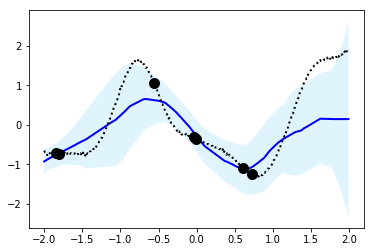

Iteration: 80000, loss: -0.1203610897064209


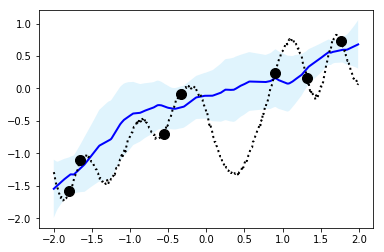

Iteration: 90000, loss: -0.06816329807043076


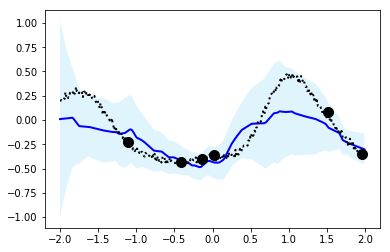

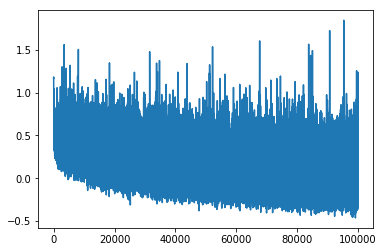

In [7]:
loss_graph = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(TRAINING_ITERATIONS):
        _, l = sess.run([opt, loss])
        loss_graph.append(l)

        if i % PLOT_AFTER == 0:
            context, query, target, loss_v, pred, var = sess.run([data_test.context,
                                                                  data_test.query,
                                                                  data_test.target,
                                                                  loss, mu, sigma])
            cx, cy = context
            print('Iteration: {}, loss: {}'.format(i, loss_v))

            plot_func(query, target, cx, cy, pred, var)

plt.plot(loss_graph)

In [8]:
z_output_sizes = [128, 128, 128, 128]
enc_output_sizes = [128, 128, 128, 128]
dec_output_sizes = [128, 128, 1]

model = neural_process.NeuralProcess(z_output_sizes, enc_output_sizes, dec_output_sizes)

loss = model.loss(data_train.context,
                  data_train.query,
                  data_train.target)

_, mu, sigma = model(data_test.context, data_test.query)

opt = tf.train.AdamOptimizer(1e-4).minimize(loss)

Iteration: 0, loss: 1225.40234375


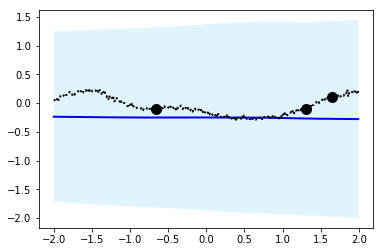

Iteration: 10000, loss: 414.0417785644531


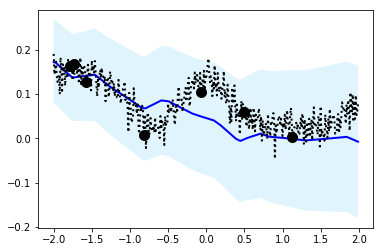

Iteration: 20000, loss: 186.76925659179688


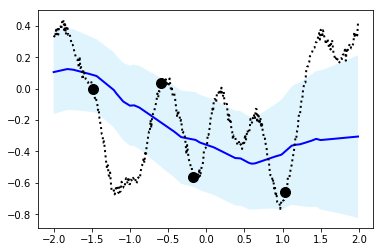

Iteration: 30000, loss: 248.95703125


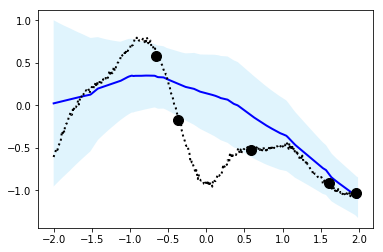

Iteration: 40000, loss: 29.85907554626465


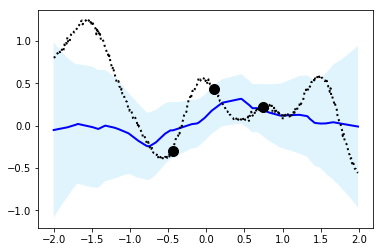

Iteration: 50000, loss: -10.036738395690918


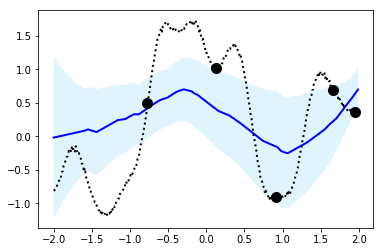

Iteration: 60000, loss: -41.18827819824219


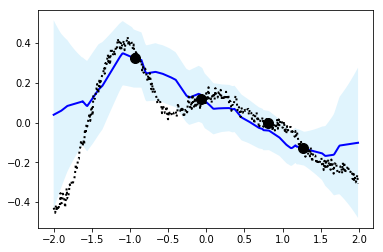

Iteration: 70000, loss: 318.3113708496094


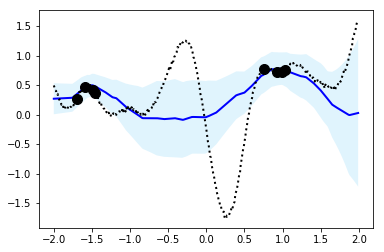

Iteration: 80000, loss: 253.81390380859375


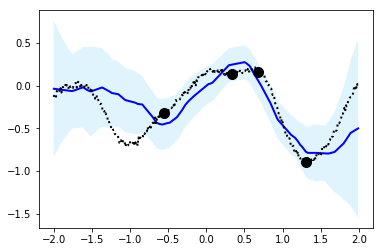

Iteration: 90000, loss: -81.85443115234375


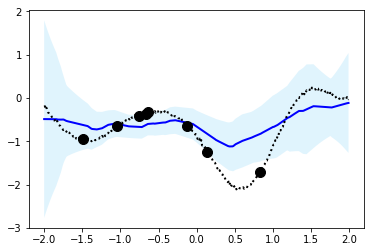

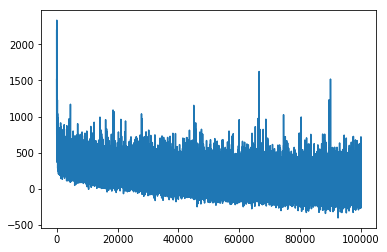

In [9]:
loss_graph = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(TRAINING_ITERATIONS):
        _, l = sess.run([opt, loss])
        loss_graph.append(l)

        if i % PLOT_AFTER == 0:
            context, query, target, loss_v, pred, var = sess.run([data_test.context,
                                                                  data_test.query,
                                                                  data_test.target,
                                                                  loss, mu, sigma])
            cx, cy = context
            print('Iteration: {}, loss: {}'.format(i, loss_v))

            plot_func(query, target, cx, cy, pred, var)

plt.plot(loss_graph)

In [10]:
z_output_sizes = [128, 128, 128, 128]
enc_output_sizes = [128, 128, 128, 128]
cross_output_sizes = [128, 128, 128, 128]
dec_output_sizes = [128, 128, 1]

self_attention = neural_process.Attention(attention_type='multihead', proj=[128, 128])
cross_attention = neural_process.Attention(attention_type='multihead', proj=[128, 128])

model = neural_process.AttentiveNP(z_output_sizes,
                                   enc_output_sizes,
                                   cross_output_sizes,
                                   dec_output_sizes,
                                   self_attention,
                                   cross_attention)

loss = model.loss(data_train.context,
                  data_train.query,
                  data_train.target)

_, mu, sigma = model(data_test.context, data_test.query)

opt = tf.train.AdamOptimizer(1e-4).minimize(loss)

Iteration: 0, loss: 1448.6737060546875


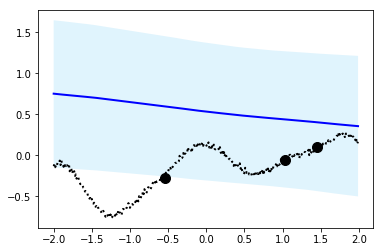

Iteration: 10000, loss: 252.2554931640625


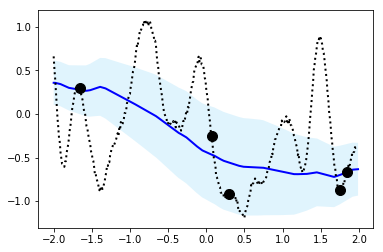

Iteration: 20000, loss: 52.16093063354492


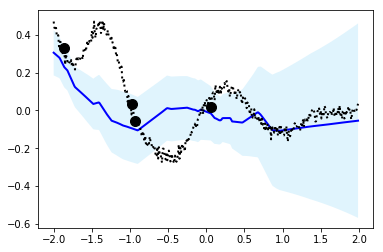

Iteration: 30000, loss: 33.3973503112793


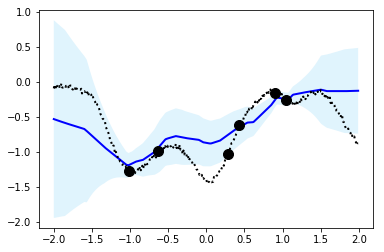

Iteration: 40000, loss: -177.61233520507812


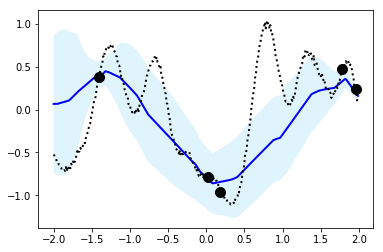

Iteration: 50000, loss: -17.765331268310547


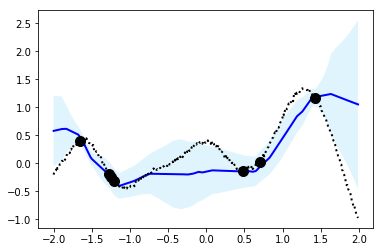

Iteration: 60000, loss: -130.7373504638672


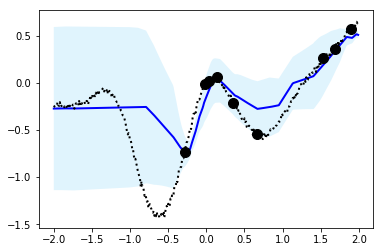

Iteration: 70000, loss: -119.9509048461914


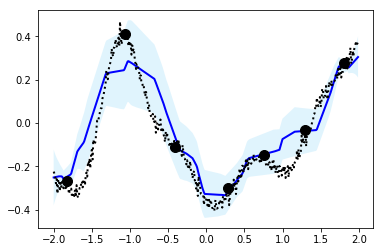

Iteration: 80000, loss: -705.2891845703125


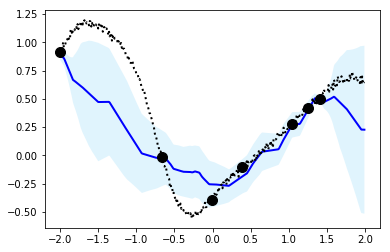

Iteration: 90000, loss: -483.74920654296875


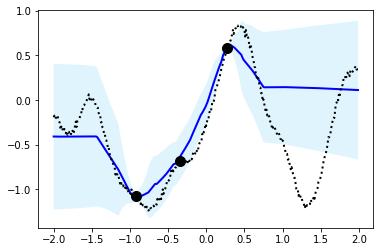

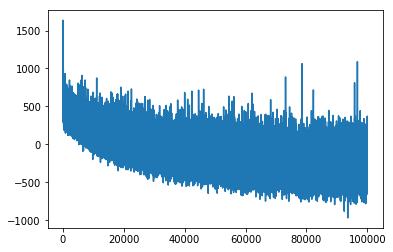

In [11]:
loss_graph = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(TRAINING_ITERATIONS):
        _, l = sess.run([opt, loss])
        loss_graph.append(l)

        if i % PLOT_AFTER == 0:
            context, query, target, loss_v, pred, var = sess.run([data_test.context,
                                                                  data_test.query,
                                                                  data_test.target,
                                                                  loss, mu, sigma])
            cx, cy = context
            print('Iteration: {}, loss: {}'.format(i, loss_v))

            plot_func(query, target, cx, cy, pred, var)

plt.plot(loss_graph)